# Extra exercises

This notebook contains extra exercises that can be used to replace or extend the current course notebooks.

1. [Introductory Python exercises](#python)
    1. [Exponential](#exp)
    1. [Seconds to years](#s2y)
    1. [Celsius to Fahrenheit](#c2f)
    1. [Liters to gallons](#l2g)
1. [Particle physics -related](#pp)
    1. [CMS dimuon invariant mass graph reconstructed](#cms)

<a id="python"></a>
## Introductory Python exercises

<a id="exp"></a>
### Exponential

<p>Write a function <b>exponential( x, a, b, f0 )</b> that returns the value of the function \( f(x)=ae^{bx}+f_0 \).</p>

In [21]:
# possible solution

import numpy as np

def exponential( x, a, b, f0 ):
    return a*np.exp(b*x) + f0


# Hint 1: Use exp()-function from numpy-module.
# Hint 2: exp-function can be used like this:
#             import numpy as np
#             np.exp(...)
# Hint 3: A possible solution would be (fill the spots with ...):
#             import numpy as np
#             def exponential( x, a, b, f0 ):
#                 return ... * np.exp(...) + ...

In [22]:
# Tests

# Test1:
# x=-1, a=b=1, f0=0
x = -1
a = b = 1
f0 = 0
print(round(exponential(x,a,b,f0),2))
# expected output:
# 0.37

# Test2:
# x=b=1, a=0, f0=18
x = b = 1
a = 0 
f0 = 18
print(exponential(x,a,b,f0))
# expected output:
# 18.0

# Test3:
# x=3, a=18, b=-0.71, f0=-5.968
x = 3
a = 18
b = -0.71
f0  =-5.968
print(round(exponential(x,a,b,f0),2))
# expected output:
# -3.83

0.37
18.0
-3.83


<a id="s2y"></a>
### Seconds to years

Write a function **secondsToYears(seconds)** that transforms seconds into years. Assume that a year has 365 days.

In [23]:
# possible solution

def secondsToYears(seconds):
    mins = seconds/60
    hours = mins/60
    days = hours/24
    years = days/365
    return years

In [24]:
print(round(secondsToYears(31536000),2))

1.0


<a id="c2f"></a>
### Celsius to Fahrenheit

Write a function **celsiusToFahrenheit(celsius)** that transforms temperature in degrees Celsius to Fahrenheit. To do the transformation, first multiply by 1.8 and then add 32.

In [25]:
def celsiusToFahrenheit(celsius):
    return 1.8*celsius+32

In [26]:
print(round(celsiusToFahrenheit(15),2))

59.0


<a id="l2g"></a>
### Liters to gallons

Write a function **litersToGallons(liters)** that transforms the value in liters to value in gallons (US). Assume that one US gallon is equal to 3.785411784 liters.

In [27]:
def litersToGallons(liters):
    return 1/3.785411784*liters

In [28]:
print(round(litersToGallons(11),2))

2.91


<a id="pp"></a>
## Particle physics -related

<a id="cms"></a>
### CMS dimuon invariant mass graph reconstructed

Try to reconstruct the CMS dimuon graph (Figure 1) using dataset "DoubleMuRun2011A.csv". Hint: Make a histogram of lg(inv_mass). Then use the weights-attribute of plt.hist() to give appropriate weights to the bins. Also, use logarithmic scale for y-axis.

<figure>
    <img src="../images/CMShistogram.png" alt="image missing" style="height: 350px" />
    <figcaption>Figure 1: CMS dimuon histogram.</figcaption>
</figure>

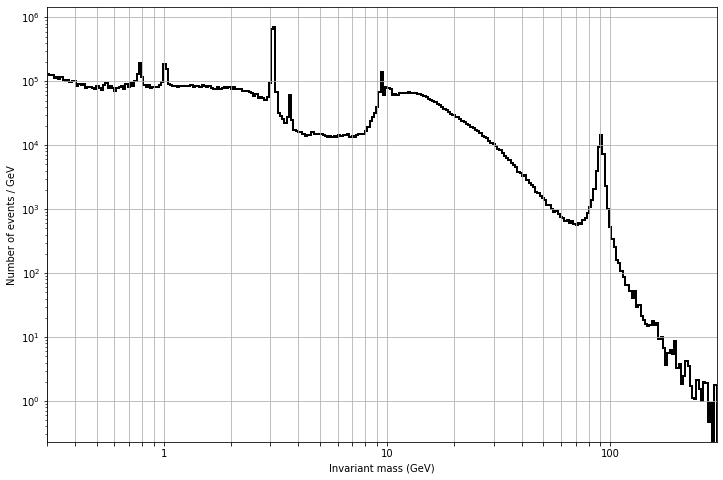

In [20]:
# possible solution

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data and the invariant mass 
ds = pd.read_csv('DoubleMuRun2011A.csv')
M = ds.M
M2 = np.log10(M)
bins = int(max(M)) # to get number of events roughly per GeV
plt.figure(figsize=(12,8))
plt.hist(M2, bins=bins, log=True, weights = bins/M/np.log(10),histtype='step',color='k',linewidth=2)
plt.xlim(np.log10(min(M)),np.log10(max(M)))
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events / GeV')
plt.grid()
ticks = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100] # maybe not the optimal way but it works
ticklabels = ["","","","","","","",1,"","","","","","","","",10,"","","","","","","","",100]
plt.xticks(np.log10(ticks),ticklabels)
plt.show()